# **K-Nearest Neighbor**

### **Import**

In [2033]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### **Load the Data**

In [2034]:
df = pd.read_csv('../cleaned_data.csv')

## **Model Training**

### **Model 1: All Features (K-value = 1)**

In [2035]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [2036]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [2037]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [2038]:
knn = KNeighborsClassifier(n_neighbors=1)

In [2039]:
knn.fit(X_train1, y_train1)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2040]:
y_pred1 = knn.predict(X_test1)

In [2041]:
metrics.accuracy_score(y_test1, y_pred1)

0.8581560283687943

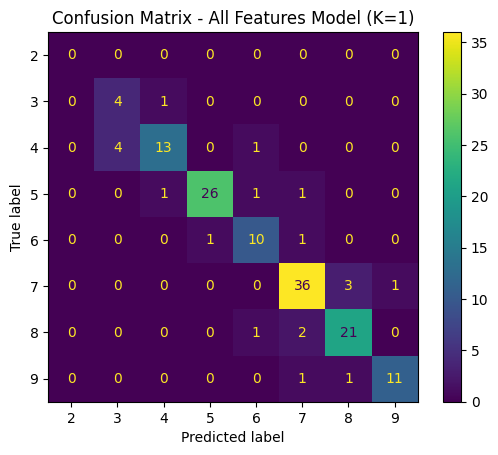

In [2042]:
conf_matrix = confusion_matrix(y_test1, y_pred1, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model (K=1)')
plt.show()

In [2043]:
precision = precision_score(y_test1, y_pred1, average='weighted')
recall = recall_score(y_test1, y_pred1, average='weighted')
f1 = f1_score(y_test1, y_pred1, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8685
Recall: 0.8582
F1-Score: 0.8607


### **Model 2: All Features (K-value = 3)**

In [2044]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [2045]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [2046]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [2047]:
knn = KNeighborsClassifier(n_neighbors=3)

In [2048]:
knn.fit(X_train3, y_train3)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2049]:
y_pred3 = knn.predict(X_test3)

In [2050]:
metrics.accuracy_score(y_test3, y_pred3)

0.8226950354609929

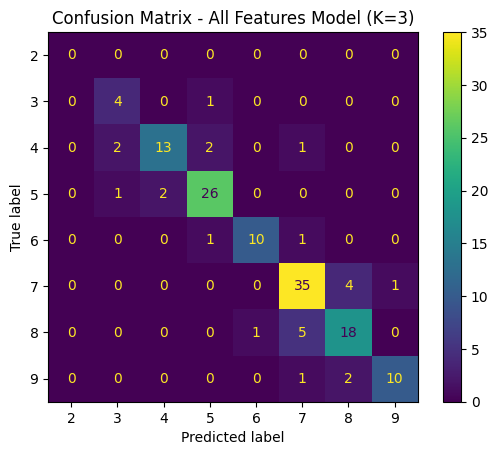

In [2051]:
conf_matrix = confusion_matrix(y_test3, y_pred3, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model (K=3)')
plt.show()

In [2052]:
precision = precision_score(y_test3, y_pred3, average='weighted')
recall = recall_score(y_test3, y_pred3, average='weighted')
f1 = f1_score(y_test3, y_pred3, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8289
Recall: 0.8227
F1-Score: 0.8232


### **Model 3: All Features (K-value = 5)**

In [2053]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [2054]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [2055]:
print(X_train5.shape)
print(y_train5.shape)
print(X_test5.shape)
print(y_test5.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [2056]:
knn = KNeighborsClassifier(n_neighbors=5)

In [2057]:
knn.fit(X_train5, y_train5)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2058]:
y_pred5 = knn.predict(X_test5)

In [2059]:
metrics.accuracy_score(y_test5, y_pred5)

0.8368794326241135

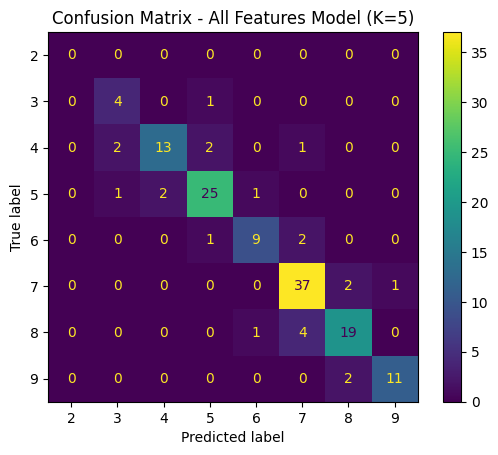

In [2060]:
conf_matrix = confusion_matrix(y_test5, y_pred5, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model (K=5)')
plt.show()

In [2061]:
precision = precision_score(y_test5, y_pred5, average='weighted')
recall = recall_score(y_test5, y_pred5, average='weighted')
f1 = f1_score(y_test5, y_pred5, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8415
Recall: 0.8369
F1-Score: 0.8368


### **Model 4: Selected Features (K-value = 1)**
**Features with > .5 positive or negative correlation**
- Conflicts_Over_Social_Media
- Mental_Health_Score
- Sleep_Hours_Per_Night
- Affects_Academic_Performance
- Avg_Daily_Usage_Hours

In [2062]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [2063]:
X_train_selected1, X_test_selected1, y_train_selected1, y_test_selected1 = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [2064]:
print(X_train_selected1.shape)
print(y_train_selected1.shape)
print(X_test_selected1.shape)
print(y_test_selected1.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [2065]:
knn_selected = KNeighborsClassifier(n_neighbors=1)

In [2066]:
knn_selected.fit(X_train_selected1, y_train_selected1)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2067]:
y_pred_selected1 = knn_selected.predict(X_test_selected1)

In [2068]:
metrics.accuracy_score(y_test_selected1, y_pred_selected1)

0.8368794326241135

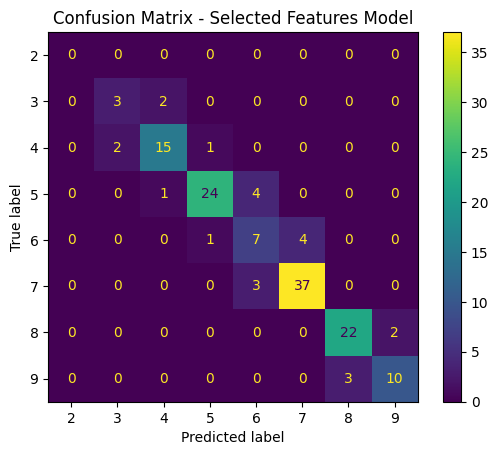

In [2069]:
conf_matrix_selected = confusion_matrix(y_test_selected1, y_pred_selected1, labels=knn_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=knn_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model')
plt.show()

In [2070]:
precision = precision_score(y_test_selected1, y_pred_selected1, average='weighted')
recall = recall_score(y_test_selected1, y_pred_selected1, average='weighted')
f1 = f1_score(y_test_selected1, y_pred_selected1, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8427
Recall: 0.8369
F1-Score: 0.8388


### **Model 5: Selected Features (K-value = 3)**
**Features with > .5 positive or negative correlation**
- Conflicts_Over_Social_Media
- Mental_Health_Score
- Sleep_Hours_Per_Night
- Affects_Academic_Performance
- Avg_Daily_Usage_Hours

In [2071]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [2072]:
X_train_selected3, X_test_selected3, y_train_selected3, y_test_selected3 = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [2073]:
print(X_train_selected3.shape)
print(y_train_selected3.shape)
print(X_test_selected3.shape)
print(y_test_selected3.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [2074]:
knn_selected = KNeighborsClassifier(n_neighbors=3)

In [2075]:
knn_selected.fit(X_train_selected3, y_train_selected3)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2076]:
y_pred_selected3 = knn_selected.predict(X_test_selected3)

In [2077]:
metrics.accuracy_score(y_test_selected3, y_pred_selected3)

0.8581560283687943

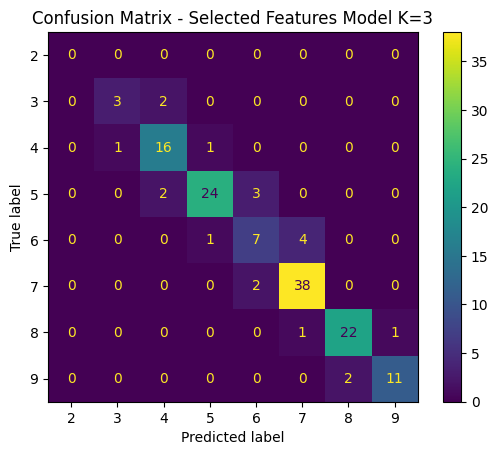

In [2078]:
conf_matrix_selected = confusion_matrix(y_test_selected3, y_pred_selected3, labels=knn_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=knn_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model K=3')
plt.show()

In [2079]:
precision = precision_score(y_test_selected3, y_pred_selected3, average='weighted')
recall = recall_score(y_test_selected3, y_pred_selected3, average='weighted')
f1 = f1_score(y_test_selected3, y_pred_selected3, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8595
Recall: 0.8582
F1-Score: 0.8572


### **Model 6: Selected Features (K-value = 5)**
**Features with > .5 positive or negative correlation**
- Conflicts_Over_Social_Media
- Mental_Health_Score
- Sleep_Hours_Per_Night
- Affects_Academic_Performance
- Avg_Daily_Usage_Hours

In [2080]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [2081]:
X_train_selected5, X_test_selected5, y_train_selected5, y_test_selected5 = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [2082]:
print(X_train_selected5.shape)
print(y_train_selected5.shape)
print(X_test_selected5.shape)
print(y_test_selected5.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [2083]:
knn_selected = KNeighborsClassifier(n_neighbors=5)

In [2084]:
knn_selected.fit(X_train_selected5, y_train_selected5)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [2085]:
y_pred_selected5 = knn_selected.predict(X_test_selected5)

In [2086]:
metrics.accuracy_score(y_test_selected5, y_pred_selected5)


0.8794326241134752

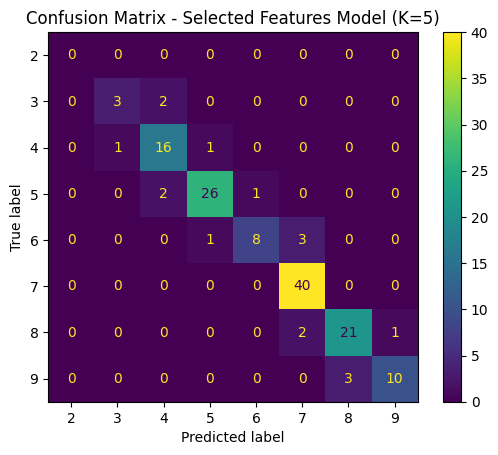

In [2087]:
conf_matrix_selected = confusion_matrix(y_test_selected5, y_pred_selected5, labels=knn_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=knn_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model (K=5)')
plt.show()

In [2088]:
precision = precision_score(y_test_selected5, y_pred_selected5, average='weighted')
recall = recall_score(y_test_selected5, y_pred_selected5, average='weighted')
f1 = f1_score(y_test_selected5, y_pred_selected5, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8803
Recall: 0.8794
F1-Score: 0.8764


## **Model Accuracy Comparison**

In [2089]:
results = []

acc1 = accuracy_score(y_test1, y_pred1)
prec1 = precision_score(y_test1, y_pred1, average='weighted')
rec1 = recall_score(y_test1, y_pred1, average='weighted')
f1_1 = f1_score(y_test1, y_pred1, average='weighted')
results.append(['Model 1: All Features (K=1)', acc1, prec1, rec1, f1_1])

acc3 = accuracy_score(y_test3, y_pred3)
prec3 = precision_score(y_test3, y_pred3, average='weighted')
rec3 = recall_score(y_test3, y_pred3, average='weighted')
f1_3 = f1_score(y_test3, y_pred3, average='weighted')
results.append(['Model 2: All Features (K=3)', acc3, prec3, rec3, f1_3])

acc5 = accuracy_score(y_test5, y_pred5)
prec5 = precision_score(y_test5, y_pred5, average='weighted')
rec5 = recall_score(y_test5, y_pred5, average='weighted')
f1_5 = f1_score(y_test5, y_pred5, average='weighted')
results.append(['Model 3: All Features (K=5)', acc5, prec5, rec5, f1_5])

acc_sel1 = accuracy_score(y_test_selected1, y_pred_selected1)
prec_sel1 = precision_score(y_test_selected1, y_pred_selected1, average='weighted')
rec_sel1 = recall_score(y_test_selected1, y_pred_selected1, average='weighted')
f1_sel1 = f1_score(y_test_selected1, y_pred_selected1, average='weighted')
results.append(['Model 4: Selected Features (K=1)', acc_sel1, prec_sel1, rec_sel1, f1_sel1])

acc_sel3 = accuracy_score(y_test_selected3, y_pred_selected3)
prec_sel3 = precision_score(y_test_selected3, y_pred_selected3, average='weighted')
rec_sel3 = recall_score(y_test_selected3, y_pred_selected3, average='weighted')
f1_sel3 = f1_score(y_test_selected3, y_pred_selected3, average='weighted')
results.append(['Model 5: Selected Features (K=3)', acc_sel3, prec_sel3, rec_sel3, f1_sel3])

acc_sel5 = accuracy_score(y_test_selected5, y_pred_selected5)
prec_sel5 = precision_score(y_test_selected5, y_pred_selected5, average='weighted')
rec_sel5 = recall_score(y_test_selected5, y_pred_selected5, average='weighted')
f1_sel5 = f1_score(y_test_selected5, y_pred_selected5, average='weighted')
results.append(['Model 6: Selected Features (K=5)', acc_sel5, prec_sel5, rec_sel5, f1_sel5])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Model 1: All Features (K=1),0.858156,0.868477,0.858156,0.860669
1,Model 2: All Features (K=3),0.822695,0.828907,0.822695,0.823245
2,Model 3: All Features (K=5),0.836879,0.841521,0.836879,0.836800
3,Model 4: Selected Features (K=1),0.836879,0.842696,0.836879,0.838758
4,Model 5: Selected Features (K=3),0.858156,0.859466,0.858156,0.857212
5,Model 6: Selected Features (K=5),0.879433,0.880276,0.879433,0.876387
